In [245]:
import numpy as np
import pandas as pd
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn 

In [246]:
df = pd.read_csv('/Users/xiaoshuaiheng/Desktop/Thesis Project/eyes/full_df.csv')
del df['Patient Age']
del df['Patient Sex']
del df['filepath']
del df['labels']
del df['target']
del df['filename']

In [247]:
df["Left-Diagnostic Keywords"] = df["Left-Diagnostic Keywords"].str.replace("nonproliferative", "non proliferative")
df["Right-Diagnostic Keywords"] = df["Right-Diagnostic Keywords"].str.replace("nonproliferative", "non proliferative")

In [248]:
def helper(text):
    res = ''
    if 'normal' in text:
        return  '0'
    if 'non proliferative retinopathy' in text:
        res += '1'
    if 'glaucoma'in text:
        res += '2'
    if 'cataract' in text:
        res += '3'
    if 'age-related macular degeneration'in text:
        res += '4'
    if 'hypertensive retinopathy' in text:
        res += '5'
    if 'pathological myopia'in text:
        res += '6'
    return res

In [249]:
df['L'] = df['Left-Diagnostic Keywords'].apply(lambda x : helper(x))
df['R'] = df['Right-Diagnostic Keywords'].apply(lambda x : helper(x))

In [250]:
df.head(50)

,ID,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,L,R
0,0,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,3,0
1,1,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,0,0
2,2,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,1,1
3,4,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild non proliferative retinopathy,0,1,0,0,0,0,0,1,,1
4,5,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,1,1
5,6,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,,1
6,7,7_left.jpg,7_right.jpg,drusen,mild non proliferative retinopathy,0,1,0,0,0,0,0,1,,1
7,8,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,0,0
8,9,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1,0,
9,10,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus,0,0,0,0,0,0,0,1,,0


In [251]:
# count different classes

In [252]:
counter = [0,0,0,0,0,0,0]
for indexs in tqdm(df.index):
    img = df.loc[indexs].values[0:-1][1:14][0]
    label = df.loc[indexs].values[0:-1][1:14][-1]
    if label == '' or len(label) > 1:
        continue
    counter[int(label)] += 1
for indexs in tqdm(df.index):
    img = df.loc[indexs].values[0:-1][2:15][0]
    label = df.loc[indexs].values[0:-1][2:15][-1]
    if label == '' or len(label) > 1:
        continue
    counter[int(label)] += 1
print(counter)

100%|██████████| 6392/6392 [00:02<00:00, 2401.99it/s]

[5796, 2974, 584, 572, 494, 234, 424]


In [253]:
df_counter = pd.DataFrame()
df_counter['categories'] = ['Normal','Diabetes','Glaucoma','Cataract','Age related Macular Degeneration','Hypertension','Pathological Myopia']
df_counter['numbers'] = counter

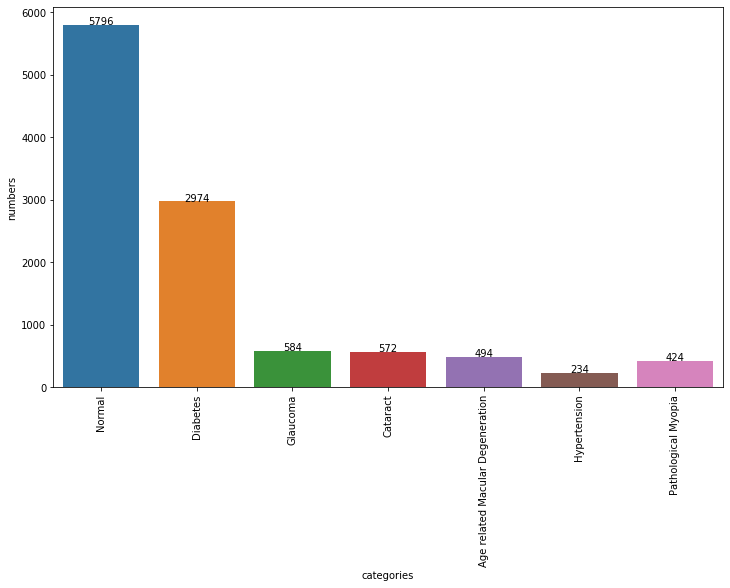

In [254]:
plt.figure(figsize = (12,7))
plt.xticks(rotation = 90)
seaborn.barplot(x = 'categories', y = 'numbers', data = df_counter)
for index,value in enumerate(counter):
    plt.text(x = index, y = value, s = value, color = 'black', ha = 'center')
plt.show()

In [255]:
# extract different classes images

In [256]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
dataset_dir = '/Users/xiaoshuaiheng/Desktop/Thesis Project/eyes/preprocessed_images/'
image_size = 224
counter = [0,0,0,0,0,0,0]  # count different classes
def extract(dataset,name):
    for indexs in tqdm(df.index):
        img = df.loc[indexs].values[0:-1][1:14][0]
        label = df.loc[indexs].values[0:-1][1:14][-1]
        if label == name:
            image_path = os.path.join(dataset_dir,img)
            try:
                image = cv2.imread(image_path,cv2.IMREAD_COLOR)
                image = cv2.resize(image, (image_size, image_size))
                counter[int(label)] += 1
            except:
                continue
            dataset.append([np.array(image), np.array(int(label))])
    random.shuffle(dataset)
    for indexs in tqdm(df.index):
        img = df.loc[indexs].values[0:-1][2:15][0]
        label = df.loc[indexs].values[0:-1][2:15][-1]
        if label == name:
            image_path = os.path.join(dataset_dir,img)
            try:
                image = cv2.imread(image_path,cv2.IMREAD_COLOR)
                image = cv2.resize(image, (image_size, image_size))
                counter[int(label)] += 1
            except:
                continue
            dataset.append([np.array(image), np.array(int(label))])
    random.shuffle(dataset)
    return dataset

In [257]:
N_dataset = extract([],'0')

100%|██████████| 6392/6392 [00:14<00:00, 445.28it/s] 


In [258]:
len(N_dataset)

5672

In [259]:
D_dataset = extract([],'1')
G_dataset = extract([],'2')
C_dataset = extract([],'3')
A_dataset = extract([],'4')
H_dataset = extract([],'5')
M_dataset = extract([],'6')

100%|██████████| 6392/6392 [00:03<00:00, 2086.81it/s]


In [260]:
print(len(N_dataset))
print(len(D_dataset))
print(len(G_dataset))
print(len(C_dataset))
print(len(A_dataset))
print(len(H_dataset))
print(len(M_dataset))

5672
2919
578
562
491
233
408


In [261]:
# randomly plot images
def plot_images(dataset,label,index):
    sample = random.choice(range(len(dataset)))
    image, category = dataset[sample][0], dataset[sample][1]
    plt.subplot(2,7,index)
    image2 = image[:,:,[2,1,0]]
    plt.imshow(image2)
    plt.xlabel(label)
    
    sample = random.choice(range(len(dataset)))
    image, category = dataset[sample][0], dataset[sample][1]
    plt.subplot(2,7,index + 7)
    image2 = image[:,:,[2,1,0]]
    plt.imshow(image2)
    plt.xlabel(label)

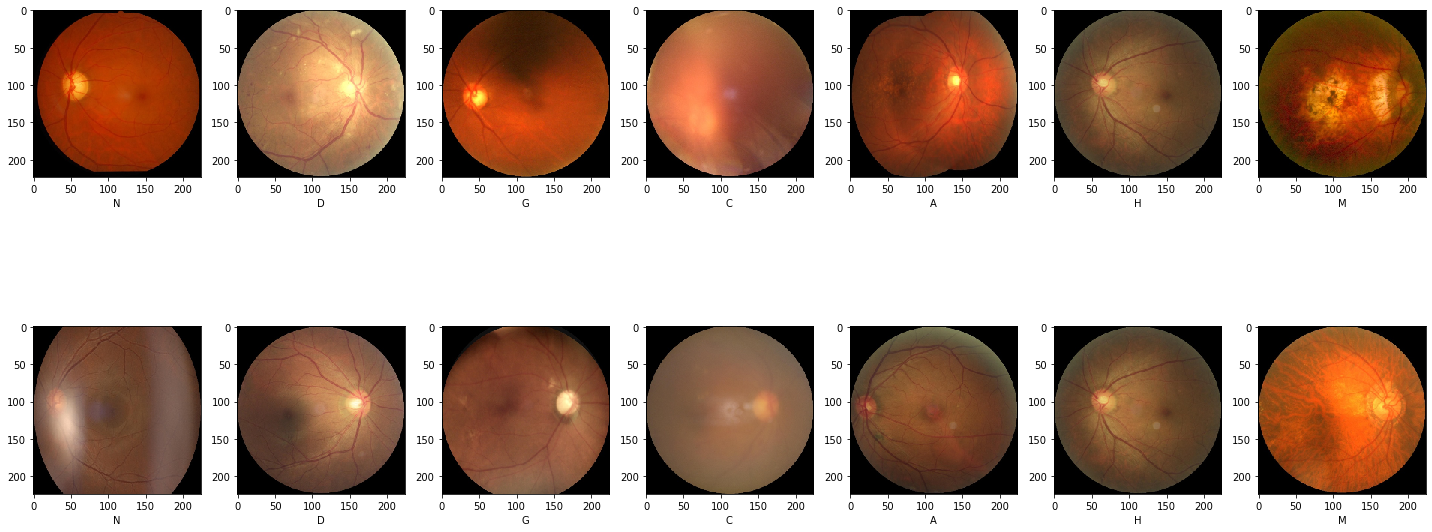

In [262]:
plt.figure(figsize = (20,10))
plot_images(N_dataset,'N',1)
plot_images(D_dataset,'D',2)
plot_images(G_dataset,'G',3)
plot_images(C_dataset,'C',4)
plot_images(A_dataset,'A',5)
plot_images(H_dataset,'H',6)
plot_images(M_dataset,'M',7)
plt.tight_layout()

In [263]:
# doing Gaussian Blur

In [264]:
N_dataset_aug = []
D_dataset_aug = []
G_dataset_aug = []
C_dataset_aug = []
A_dataset_aug = []
H_dataset_aug = []
M_dataset_aug = []

In [265]:
def GaussianBlur(dataset,new_dataset):
    for i in tqdm(range(len(dataset))):
        image = dataset[i][0]
        sigmaX=10
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        new_dataset.append([np.array(image), np.array(0)])
    return new_dataset

In [266]:
N_dataset_aug = GaussianBlur(N_dataset,N_dataset_aug)
D_dataset_aug = GaussianBlur(D_dataset,D_dataset_aug)
G_dataset_aug = GaussianBlur(G_dataset,G_dataset_aug)
C_dataset_aug = GaussianBlur(C_dataset,C_dataset_aug)
A_dataset_aug = GaussianBlur(A_dataset,A_dataset_aug)
H_dataset_aug = GaussianBlur(H_dataset,H_dataset_aug)
M_dataset_aug = GaussianBlur(M_dataset,M_dataset_aug)

100%|██████████| 408/408 [00:02<00:00, 159.13it/s]


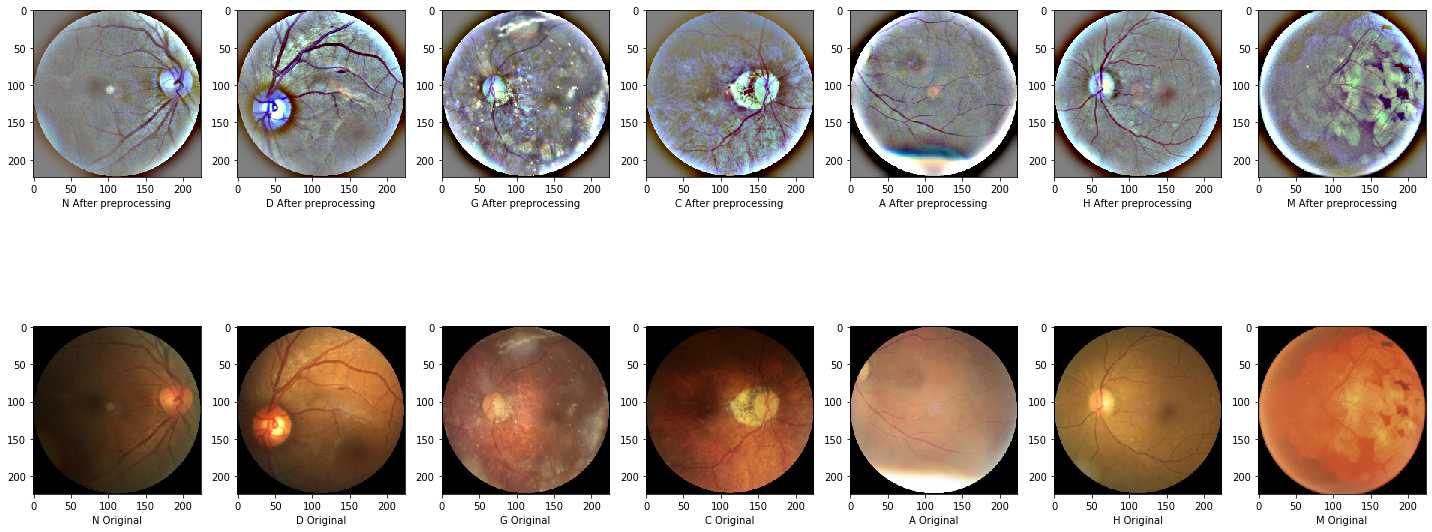

In [267]:
# randomly plot processed images
plt.figure(figsize = (20,10))
for i in range(1):
    sample = random.choice(range(len(N_dataset)))
    plt.subplot(2,7,i+1)
    plt.imshow(N_dataset_aug[sample][0][:,:,[2,1,0]])
    plt.xlabel('N After preprocessing')
    plt.subplot(2,7,i+1+7)
    plt.imshow(N_dataset[sample][0][:,:,[2,1,0]])
    plt.xlabel('N Original')
    
    sample = random.choice(range(len(D_dataset)))
    plt.subplot(2,7,i+2)
    plt.imshow(D_dataset_aug[sample][0][:,:,[2,1,0]])
    plt.xlabel('D After preprocessing')
    plt.subplot(2,7,i+2+7)
    plt.imshow(D_dataset[sample][0][:,:,[2,1,0]])
    plt.xlabel('D Original')
    
    sample = random.choice(range(len(G_dataset)))
    plt.subplot(2,7,i+3)
    plt.imshow(G_dataset_aug[sample][0][:,:,[2,1,0]])
    plt.xlabel('G After preprocessing')
    plt.subplot(2,7,i+3+7)
    plt.imshow(G_dataset[sample][0][:,:,[2,1,0]])
    plt.xlabel('G Original')
    
    sample = random.choice(range(len(C_dataset)))
    plt.subplot(2,7,i+4)
    plt.imshow(C_dataset_aug[sample][0][:,:,[2,1,0]])
    plt.xlabel('C After preprocessing')
    plt.subplot(2,7,i+4+7)
    plt.imshow(C_dataset[sample][0][:,:,[2,1,0]])
    plt.xlabel('C Original')
    
    sample = random.choice(range(len(A_dataset)))
    plt.subplot(2,7,i+5)
    plt.imshow(A_dataset_aug[sample][0][:,:,[2,1,0]])
    plt.xlabel('A After preprocessing')
    plt.subplot(2,7,i+5+7)
    plt.imshow(A_dataset[sample][0][:,:,[2,1,0]])
    plt.xlabel('A Original')
    
    sample = random.choice(range(len(H_dataset)))
    plt.subplot(2,7,i+6)
    plt.imshow(H_dataset_aug[sample][0][:,:,[2,1,0]])
    plt.xlabel('H After preprocessing')
    plt.subplot(2,7,i+6+7)
    plt.imshow(H_dataset[sample][0][:,:,[2,1,0]])
    plt.xlabel('H Original')
    
    sample = random.choice(range(len(M_dataset)))
    plt.subplot(2,7,i+7)
    plt.imshow(M_dataset_aug[sample][0][:,:,[2,1,0]])
    plt.xlabel('M After preprocessing')
    plt.subplot(2,7,i+7+7)
    plt.imshow(M_dataset[sample][0][:,:,[2,1,0]])
    plt.xlabel('M Original')
plt.tight_layout()

In [268]:
# A augmentation

In [269]:
print('original A_Dataset has %d images' % len(A_dataset_aug))

original A_Dataset has 491 images


In [270]:
import tensorflow as tf
def data_augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_hue(image, 0.01)
    image = tf.image.random_saturation(image, 0.7, 1.3)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_brightness(image, 0.1)
    return image   

In [271]:
for i in range(len(A_dataset_aug)):
    image = A_dataset_aug[i][0]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(224,224))
    
    new_image1 = data_augment(image)
    new_image2 = data_augment(image)
    new_image3 = data_augment(image)
    sigmaX=10
    #new_image1 = cv2.cvtColor(new_image1, cv2.COLOR_BGR2RGB)
    new_image1=cv2.addWeighted ( np.array(new_image1),4, cv2.GaussianBlur( np.array(new_image1) , (0,0) , sigmaX) ,-4 ,128)
    #new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2RGB)
    new_image2=cv2.addWeighted ( np.array(new_image2),4, cv2.GaussianBlur( np.array(new_image2) , (0,0) , sigmaX) ,-4 ,128)
    #new_image3 = cv2.cvtColor(new_imag3, cv2.COLOR_BGR2RGB)
    new_image3=cv2.addWeighted ( np.array(new_image3),4, cv2.GaussianBlur( np.array(new_image3) , (0,0) , sigmaX) ,-4 ,128)
    A_dataset_aug.append([np.array(new_image1), np.array(5)])
    A_dataset_aug.append([np.array(new_image2), np.array(5)])
    A_dataset_aug.append([np.array(new_image3), np.array(5)])

In [272]:
print('After augmentation, A_Dataset has %d images' %len(A_dataset_aug))

After augmentation, A_Dataset has 1964 images


In [273]:
# G augmentation

In [274]:
print('original G_Dataset has %d images' % len(G_dataset_aug))

original G_Dataset has 578 images


In [275]:
for i in tqdm(range(len(G_dataset_aug))):
    image = G_dataset_aug[i][0]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(224,224))
    
    new_image1 = data_augment(image)
    new_image2 = data_augment(image)
    new_image3 = data_augment(image)
    sigmaX=10
    #new_image1 = cv2.cvtColor(new_image1, cv2.COLOR_BGR2RGB)
    new_image1=cv2.addWeighted ( np.array(new_image1),4, cv2.GaussianBlur( np.array(new_image1) , (0,0) , sigmaX) ,-4 ,128)
    #new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2RGB)
    new_image2=cv2.addWeighted ( np.array(new_image2),4, cv2.GaussianBlur( np.array(new_image2) , (0,0) , sigmaX) ,-4 ,128)
    #new_image3 = cv2.cvtColor(new_imag3, cv2.COLOR_BGR2RGB)
    new_image3=cv2.addWeighted ( np.array(new_image3),4, cv2.GaussianBlur( np.array(new_image3) , (0,0) , sigmaX) ,-4 ,128)
    G_dataset_aug.append([np.array(new_image1), np.array(3)])
    G_dataset_aug.append([np.array(new_image2), np.array(3)])
    G_dataset_aug.append([np.array(new_image3), np.array(3)])
    

100%|██████████| 578/578 [00:14<00:00, 40.16it/s]


In [276]:
print('After augmentation, G_Dataset has %d images' %len(G_dataset_aug))

After augmentation, G_Dataset has 2312 images


In [277]:
# H augmentation

In [278]:
print('original H_Dataset has %d images' % len(H_dataset_aug))

original H_Dataset has 233 images


In [279]:
for i in tqdm(range(len(H_dataset_aug))):
    image = H_dataset_aug[i][0]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(224,224))
    
    new_image1 = data_augment(image)
    new_image2 = data_augment(image)
    new_image3 = data_augment(image)
    new_image4 = data_augment(image)
    sigmaX=10
    #new_image1 = cv2.cvtColor(new_image1, cv2.COLOR_BGR2RGB)
    new_image1=cv2.addWeighted ( np.array(new_image1),4, cv2.GaussianBlur( np.array(new_image1) , (0,0) , sigmaX) ,-4 ,128)
    #new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2RGB)
    new_image2=cv2.addWeighted ( np.array(new_image2),4, cv2.GaussianBlur( np.array(new_image2) , (0,0) , sigmaX) ,-4 ,128)
    #new_image3 = cv2.cvtColor(new_imag3, cv2.COLOR_BGR2RGB)
    new_image3=cv2.addWeighted ( np.array(new_image3),4, cv2.GaussianBlur( np.array(new_image3) , (0,0) , sigmaX) ,-4 ,128)
    new_image4=cv2.addWeighted ( np.array(new_image4),4, cv2.GaussianBlur( np.array(new_image4) , (0,0) , sigmaX) ,-4 ,128)
    H_dataset_aug.append([np.array(new_image1), np.array(6)])
    H_dataset_aug.append([np.array(new_image2), np.array(6)])
    H_dataset_aug.append([np.array(new_image3), np.array(6)])
    H_dataset_aug.append([np.array(new_image4), np.array(6)])

100%|██████████| 233/233 [00:07<00:00, 30.93it/s]


In [280]:
print('After augmentation, H_Dataset has %d images' %len(H_dataset_aug))

After augmentation, H_Dataset has 1165 images


In [281]:
# C augmentation

In [282]:
print('original C_Dataset has %d images' % len(C_dataset_aug))

original C_Dataset has 562 images


In [283]:
for i in tqdm(range(len(C_dataset_aug))):
    image = C_dataset_aug[i][0]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(224,224))
    
    new_image1 = data_augment(image)
    new_image2 = data_augment(image)
    new_image3 = data_augment(image)
    sigmaX=10
    #new_image1 = cv2.cvtColor(new_image1, cv2.COLOR_BGR2RGB)
    new_image1=cv2.addWeighted ( np.array(new_image1),4, cv2.GaussianBlur( np.array(new_image1) , (0,0) , sigmaX) ,-4 ,128)
    #new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2RGB)
    new_image2=cv2.addWeighted ( np.array(new_image2),4, cv2.GaussianBlur( np.array(new_image2) , (0,0) , sigmaX) ,-4 ,128)
    #new_image3 = cv2.cvtColor(new_imag3, cv2.COLOR_BGR2RGB)
    new_image3=cv2.addWeighted ( np.array(new_image3),4, cv2.GaussianBlur( np.array(new_image3) , (0,0) , sigmaX) ,-4 ,128)
    C_dataset_aug.append([np.array(new_image1), np.array(4)])
    C_dataset_aug.append([np.array(new_image2), np.array(4)])
    C_dataset_aug.append([np.array(new_image3), np.array(4)])
    

100%|██████████| 562/562 [00:14<00:00, 38.73it/s]


In [284]:
print('After augmentation, C_Dataset has %d images' %len(C_dataset_aug))

After augmentation, C_Dataset has 2248 images


In [285]:
# M augmentation

In [286]:
print('original M_Dataset has %d images' % len(M_dataset_aug))

original M_Dataset has 408 images


In [287]:
for i in tqdm(range(len(M_dataset_aug))):
    image = M_dataset_aug[i][0]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(224,224))
    
    new_image1 = data_augment(image)
    new_image2 = data_augment(image)
    new_image3 = data_augment(image)
    sigmaX=10
    #new_image1 = cv2.cvtColor(new_image1, cv2.COLOR_BGR2RGB)
    new_image1=cv2.addWeighted ( np.array(new_image1),4, cv2.GaussianBlur( np.array(new_image1) , (0,0) , sigmaX) ,-4 ,128)
    #new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2RGB)
    new_image2=cv2.addWeighted ( np.array(new_image2),4, cv2.GaussianBlur( np.array(new_image2) , (0,0) , sigmaX) ,-4 ,128)
    #new_image3 = cv2.cvtColor(new_imag3, cv2.COLOR_BGR2RGB)
    new_image3=cv2.addWeighted ( np.array(new_image3),4, cv2.GaussianBlur( np.array(new_image3) , (0,0) , sigmaX) ,-4 ,128)
    M_dataset_aug.append([np.array(new_image1), np.array(7)])
    M_dataset_aug.append([np.array(new_image2), np.array(7)])
    M_dataset_aug.append([np.array(new_image3), np.array(7)])
    

100%|██████████| 408/408 [00:10<00:00, 38.78it/s]


In [288]:
print('After augmentation, M_Dataset has %d images' %len(M_dataset_aug))

After augmentation, M_Dataset has 1632 images


In [289]:
aug_counter = [len(N_dataset_aug),len(D_dataset_aug),len(G_dataset_aug),len(C_dataset_aug),len(A_dataset_aug),len(H_dataset_aug),len(M_dataset_aug)]

In [290]:
aug_counter

[5672, 2919, 2312, 2248, 1964, 1165, 1632]

In [291]:
df_counter['aug_numbers'] = aug_counter

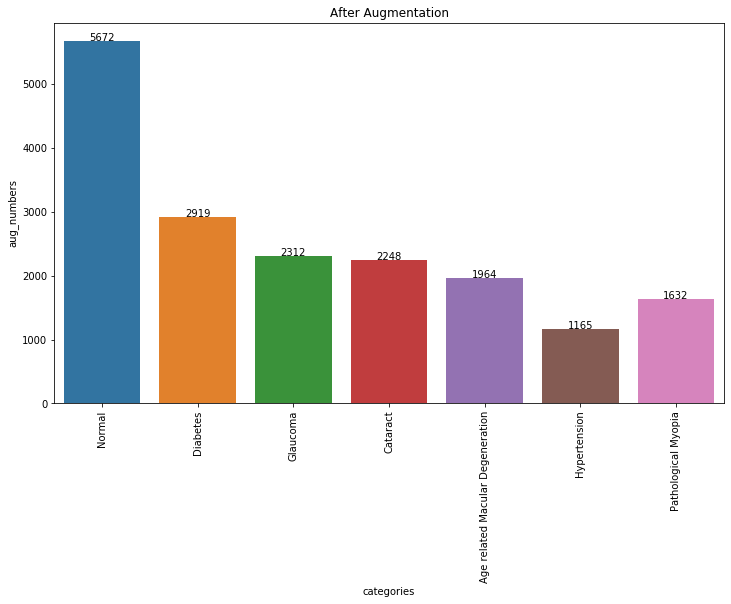

In [292]:
plt.figure(figsize = (12,7))
plt.xticks(rotation = 90)
seaborn.barplot(x = 'categories', y = 'aug_numbers', data = df_counter)
for index,value in enumerate(aug_counter):
    plt.text(x = index, y = value, s = value, color = 'black', ha = 'center')
plt.title('After Augmentation')
plt.show()

In [297]:
from sklearn.model_selection import train_test_split
def split_data(dataset):
    x = np.array([i[0] for i in dataset]).reshape(-1, 224, 224, 3)
    y = np.array([i[1] for i in dataset])
    x_train_val, x_test, y_train_val, y_test = train_test_split(x,y,test_size = 0.1)
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2)
    return x_train, y_train, x_val, y_val, x_test, y_test

In [240]:
N_dataset_x_train, N_dataset_y_train, N_dataset_x_val, N_dataset_y_val, N_dataset_x_test, N_dataset_y_test = split_data(N_dataset_aug)
D_dataset_x_train, D_dataset_y_train, D_dataset_x_val, D_dataset_y_val, D_dataset_x_test, D_dataset_y_test = split_data(D_dataset_aug)
C_dataset_x_train, C_dataset_y_train, C_dataset_x_val, C_dataset_y_val, C_dataset_x_test, C_dataset_y_test = split_data(C_dataset_aug)
G_dataset_x_train, G_dataset_y_train, G_dataset_x_val, G_dataset_y_val, G_dataset_x_test, G_dataset_y_test = split_data(G_dataset_aug)
A_dataset_x_train, A_dataset_y_train, A_dataset_x_val, A_dataset_y_val, A_dataset_x_test, A_dataset_y_test = split_data(A_dataset_aug)
H_dataset_x_train, H_dataset_y_train, H_dataset_x_val, H_dataset_y_val, H_dataset_x_test, H_dataset_y_test = split_data(H_dataset_aug)
M_dataset_x_train, M_dataset_y_train, M_dataset_x_val, M_dataset_y_val, M_dataset_x_test, M_dataset_y_test = split_data(M_dataset_aug)

In [241]:
import h5py
f = h5py.File('/Users/xiaoshuaiheng/Desktop/Thesis Project/v4/aug_dataset.hdf5',mode = 'w')

In [300]:
def save_data_as_h5py(x_train, y_train, x_val, y_val, x_test, y_test,lst):
    f.create_dataset(name = lst[0],shape = (len(x_train),224,224,3), dtype = 'i', data = x_train)
    f.create_dataset(name = lst[1],shape = (len(y_train),), dtype = 'i', data = y_train)
    f.create_dataset(name = lst[2],shape = (len(x_val),224,224,3), dtype = 'i', data = x_val)
    f.create_dataset(name = lst[3],shape = (len(y_val),), dtype = 'i', data = y_val)
    f.create_dataset(name = lst[4],shape = (len(x_test),224,224,3), dtype = 'i', data = x_test)
    f.create_dataset(name = lst[5],shape = (len(y_test),), dtype = 'i', data = y_test)

In [243]:
save_data_as_h5py(N_dataset_x_train, N_dataset_y_train, N_dataset_x_val, N_dataset_y_val, N_dataset_x_test, N_dataset_y_test,['N_dataset_x_train', 'N_dataset_y_train', 'N_dataset_x_val', 'N_dataset_y_val', 'N_dataset_x_test', 'N_dataset_y_test'])
save_data_as_h5py(D_dataset_x_train, D_dataset_y_train, D_dataset_x_val, D_dataset_y_val, D_dataset_x_test, D_dataset_y_test,['D_dataset_x_train', 'D_dataset_y_train', 'D_dataset_x_val', 'D_dataset_y_val', 'D_dataset_x_test', 'D_dataset_y_test'])
save_data_as_h5py(C_dataset_x_train, C_dataset_y_train, C_dataset_x_val, C_dataset_y_val, C_dataset_x_test, C_dataset_y_test,['C_dataset_x_train', 'C_dataset_y_train', 'C_dataset_x_val', 'C_dataset_y_val', 'C_dataset_x_test', 'C_dataset_y_test'])
save_data_as_h5py(G_dataset_x_train, G_dataset_y_train, G_dataset_x_val, G_dataset_y_val, G_dataset_x_test, G_dataset_y_test,['G_dataset_x_train', 'G_dataset_y_train', 'G_dataset_x_val', 'G_dataset_y_val', 'G_dataset_x_test', 'G_dataset_y_test'])
save_data_as_h5py(A_dataset_x_train, A_dataset_y_train, A_dataset_x_val, A_dataset_y_val, A_dataset_x_test, A_dataset_y_test,['A_dataset_x_train', 'A_dataset_y_train', 'A_dataset_x_val', 'A_dataset_y_val', 'A_dataset_x_test', 'A_dataset_y_test'])
save_data_as_h5py(H_dataset_x_train, H_dataset_y_train, H_dataset_x_val, H_dataset_y_val, H_dataset_x_test, H_dataset_y_test,['H_dataset_x_train', 'H_dataset_y_train', 'H_dataset_x_val', 'H_dataset_y_val', 'H_dataset_x_test', 'H_dataset_y_test'])
save_data_as_h5py(M_dataset_x_train, M_dataset_y_train, M_dataset_x_val, M_dataset_y_val, M_dataset_x_test, M_dataset_y_test,['M_dataset_x_train', 'M_dataset_y_train', 'M_dataset_x_val', 'M_dataset_y_val', 'M_dataset_x_test', 'M_dataset_y_test'])

In [244]:
f.close()

In [ ]:
# create all classes together 

In [293]:
data = np.concatenate((N_dataset_aug,D_dataset_aug,G_dataset_aug,C_dataset_aug,A_dataset_aug,H_dataset_aug,M_dataset_aug))

In [295]:
random.shuffle(data)

In [298]:
x_train, y_train, x_val, y_val, x_test, y_test = split_data(data)

In [299]:
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))
print(len(x_test))
print(len(y_test))

12896
12896
3224
3224
1792
1792


In [301]:
f = h5py.File('/Users/xiaoshuaiheng/Desktop/Thesis Project/v4/aug_all_dataset.hdf5',mode = 'w')

In [302]:
lst = ['x_train','y_train','x_val','y_val','x_test','y_test']
save_data_as_h5py(x_train, y_train, x_val, y_val, x_test, y_test,lst)

In [303]:
f.close()